Import cobain and other useful packages.

In [1]:
import cobain
import os
import matplotlib.pyplot as plt
import numpy as np

A differential rotator is created by providing the following parameters:

In [2]:
mass = 1. # mass
radius = 1. # radius
teff = 5777.0 # effective temperature
n = 3. # polytropic index
dims = [10,10,10] # dimensions of the mesh [potentials, thetas, phis]
bs = [0.1,0.,0.] # parameters determining the differential rotation 
                           # omega^2 = bs[0] + bs[1]s^2 + b[2]s^4 (Mohan et al. 1991) 
pot_range = 0.01 # range of potentials to build the mesh in
directory = os.getcwd()+'/diffrot_basic/'
lebedev_ndir = 5 # order of Lebedev quadratures

If none of the parameters are provided, the code will create the default systemwith mass=1.0, radius=1.0, teff=5777.0, n=3.0, dims=[50,50,50], bs=[0.1,0.,0], pot_range=0.01 and lebedev_ndir=5.
The pickled file of the class instance with the chosen parameters is stored upon creation, to avoid having to build the mesh repeatedly, as well as the initial structural quantity files. If no directory path is explicitly provided, everything will be stored in the current working directory.

To create a differentially rotating star object and its associated structural files, we call:

In [3]:
dr = cobain.bodies.star.DiffRot(mass=mass, radius=radius, teff=teff, n=n, 
                                dims=dims, bs=bs, pot_range=0.01, lebedev_ndir=5,
                                dir=directory)

/usr/local/lib/python2.7/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


2018-04-20 13:20:45,440: Building equipotential surface at pot=1.0103353160136337


2018-04-20 13:20:46,010: Building equipotential surface at pot=1.0114464271247448


2018-04-20 13:20:46,555: Building equipotential surface at pot=1.0125575382358558


2018-04-20 13:20:47,067: Building equipotential surface at pot=1.013668649346967


2018-04-20 13:20:47,576: Building equipotential surface at pot=1.0147797604580782


2018-04-20 13:20:48,061: Building equipotential surface at pot=1.0158908715691892


2018-04-20 13:20:48,545: Building equipotential surface at pot=1.0170019826803003


2018-04-20 13:20:49,015: Building equipotential surface at pot=1.0181130937914116


2018-04-20 13:20:49,465: Building equipotential surface at pot=1.0192242049025226


2018-04-20 13:20:49,926: Building equipotential surface at pot=1.0203353160136337


2018-04-20 13:20:50,403: Computing intensities for point 1 of 5


2018-04-20 13:21:24,452: Computing intensities for point 2 of 5


2018-04-20 13:21:57,463: Computing intensities for point 3 of 5


2018-04-20 13:22:29,830: Computing intensities for point 4 of 5


2018-04-20 13:23:02,495: Computing intensities for point 5 of 5


The object is by default pickled into the given directory with a filename 'body', thus loading an already created one is fairly simple: 

In [4]:
dr = cobain.bodies.star.DiffRot.unpickle(directory+'body')

The DiffRot object stores the given parameters, all computed parameters and the mesh. The contents of the mesh are stored in dr.mesh:

In [5]:
dr.mesh

{'normals': array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
        ...,
        [-7.66044443e-01,  6.42787610e-01,  5.54927817e-17],
        [-9.39692621e-01,  3.42020143e-01,  5.54927817e-17],
        [-1.00000000e+00,  1.22464680e-16,  5.54927817e-17]]),
 'phis': array([0.        , 0.34906585, 0.6981317 , 1.04719755, 1.3962634 ,
        1.74532925, 2.0943951 , 2.44346095, 2.7925268 , 3.14159265]),
 'pots': array([1.01033532, 1.01144643, 1.01255754, 1.01366865, 1.01477976,
        1.01589087, 1.01700198, 1.01811309, 1.0192242 , 1.02033532]),
 'rhos': array([1.49766667e-09, 1.49766667e-09, 1.49766667e-09, 1.49766667e-09,
        1.49766667e-09, 1.49766667e-09, 1.49766667e-09, 1.49766667e-09,
        1.49766667e-09, 1.49766667e-09, 1.49766667e-09, 1.49766667e-09,
        1.49766667e-09, 1.49766667e-09, 1.49766667e-09, 1.49766667e-09,
        1.49766667e-

The mesh stores the nested equipotential coordinates of the mesh ('potentials', 'thetas', 'phis') as well as the cartesian coordinates of the points ('rs'), their normals ('normals') and densitites ('rhos'). We can visualize the mesh with:

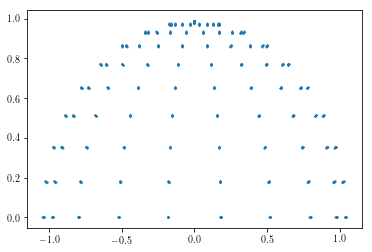

In [6]:
plt.scatter(dr.mesh['rs'][:,0], dr.mesh['rs'][:,2], s=1)
plt.show()

The plotting submodule offers some useful functions for plotting the radiative properties. You can choose to plot the intensity in a given direction:

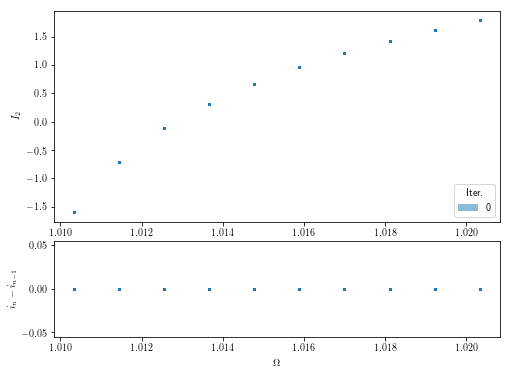

In [7]:
cobain.bodies.plotting.plot_intensity_dir(dr, simdir = dr.directory, iter_n = 0, 
                                          direction_no = 2, 
                                          pot_range = dr.pot_range, skip = 1)
# simdir - directory where we keep the rt simulations, can be anything
# iter_n - which iteration is being plotted (each one before will also be plotted)
# direction_no - the index of the Lebedev direction we're plotting
# comp = 1, 2 - primary or secondary component
# pot_range - range of potentials to show up on the plot, can be anything
# skip - in case of large meshes, the output plot is very large, so some of the points
#        can be omitted with [::skip]

The default display mode for the plot is plt.show() but it can also be saved with setting savefig=True. The output is by default saved in a directory named 'pics/' within simdir.

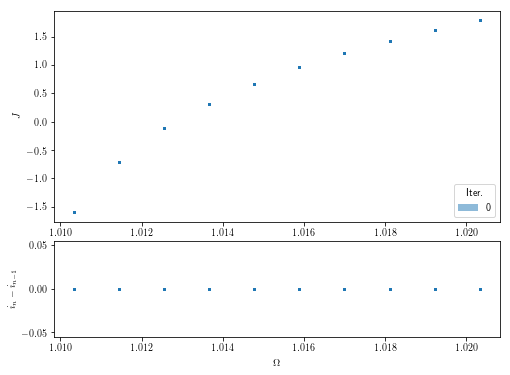

In [8]:
cobain.bodies.plotting.plot_mean_intensity(dr, simdir = dr.directory, iter_n = 0, 
                                  pot_range = dr.pot_range, skip = 1)

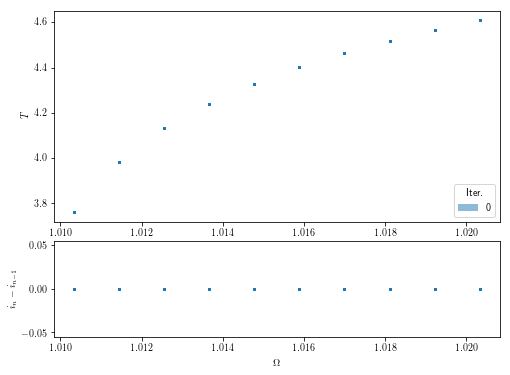

In [9]:
cobain.bodies.plotting.plot_temperature(dr, simdir = dr.directory, iter_n = 0, 
                                  pot_range = dr.pot_range, skip = 1)

We compute the intensities at a set of given points in dr.mesh['rs'] with dr.sweep_mesh():

In [11]:
points = np.linspace(0,len(dr.mesh['rs'])-1,10).astype(int)
Is_p, thetas_p, phis_p = dr.sweep_mesh(points=points)

2018-04-20 13:44:36,714: Computing intensities for point 1 of 10


2018-04-20 13:44:49,282: Computing intensities for point 2 of 10


2018-04-20 13:45:10,919: Computing intensities for point 3 of 10


2018-04-20 13:45:36,910: Computing intensities for point 4 of 10


2018-04-20 13:46:02,434: Computing intensities for point 5 of 10


2018-04-20 13:46:28,595: Computing intensities for point 6 of 10


2018-04-20 13:46:53,925: Computing intensities for point 7 of 10


2018-04-20 13:47:18,510: Computing intensities for point 8 of 10


2018-04-20 13:47:44,611: Computing intensities for point 9 of 10


2018-04-20 13:48:13,129: Computing intensities for point 10 of 10


thetas_p and phis_p are the spherical angles of the directions rotated with respect to the surface normals of the plots. Once the intensities in all directions are computed, the mean intensity, temperature and opacity can be recomputed with:

In [12]:
Js_p, Ts_p, chis_p = dr.conserve_energy(Is_p,points=points)